In [1]:
import yfinance as yf
import pandas as pd 
import sklearn.model_selection as sk
import numpy as np

In [2]:
data = yf.download(' aapl ',period="7D",interval="1m")
data=data.rename({"High":"high","Low":"low","Close":"close","Open":"open","Adj Close":"adj close","Volume":"volume"},axis=1)

data

[*********************100%%**********************]  1 of 1 completed


,open,high,low,close,adj close,volume
Datetime,,,,,,
2023-08-31 09:30:00-04:00,187.839996,188.100006,187.809998,188.089996,188.089996,1444289
2023-08-31 09:31:00-04:00,188.100006,188.339996,188.029999,188.320007,188.320007,240389
2023-08-31 09:32:00-04:00,188.309998,188.369995,188.009995,188.070007,188.070007,227674
2023-08-31 09:33:00-04:00,188.085602,188.259995,187.800003,188.225006,188.225006,285393
2023-08-31 09:34:00-04:00,188.212997,188.270004,187.789993,187.789993,187.789993,184717
...,...,...,...,...,...,...
2023-09-11 15:55:00-04:00,179.309998,179.330002,179.220001,179.247894,179.247894,316547
2023-09-11 15:56:00-04:00,179.244995,179.320007,179.240005,179.270004,179.270004,264829
2023-09-11 15:57:00-04:00,179.264999,179.330002,179.160004,179.264404,179.264404,367792


In [3]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [4]:
device= 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [5]:
from copy import deepcopy as dc
def prepareforlstm(df,loookback):
    df=pd.DataFrame(df["close"])
    df=dc(df)
    for i in range(1,loookback+1):
        df[f'close(t-{i})']=df["close"].shift(i)
    df.dropna(inplace=True)
    return df
lookback=30

In [6]:
shifted_df=prepareforlstm(data,lookback)
shifted_df

,close,close(t-1),close(t-2),close(t-3),close(t-4),close(t-5),close(t-6),close(t-7),close(t-8),close(t-9),...,close(t-21),close(t-22),close(t-23),close(t-24),close(t-25),close(t-26),close(t-27),close(t-28),close(t-29),close(t-30)
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-08-31 10:00:00-04:00,188.249603,188.054398,188.139999,188.240005,188.095001,188.270004,188.199997,188.279404,188.100098,187.947998,...,188.180099,188.145004,187.925003,187.922897,187.750000,187.789993,188.225006,188.070007,188.320007,188.089996
2023-08-31 10:01:00-04:00,188.270004,188.249603,188.054398,188.139999,188.240005,188.095001,188.270004,188.199997,188.279404,188.100098,...,188.100006,188.180099,188.145004,187.925003,187.922897,187.750000,187.789993,188.225006,188.070007,188.320007
2023-08-31 10:02:00-04:00,187.940002,188.270004,188.249603,188.054398,188.139999,188.240005,188.095001,188.270004,188.199997,188.279404,...,188.259995,188.100006,188.180099,188.145004,187.925003,187.922897,187.750000,187.789993,188.225006,188.070007
2023-08-31 10:03:00-04:00,187.960007,187.940002,188.270004,188.249603,188.054398,188.139999,188.240005,188.095001,188.270004,188.199997,...,188.089996,188.259995,188.100006,188.180099,188.145004,187.925003,187.922897,187.750000,187.789993,188.225006
2023-08-31 10:04:00-04:00,187.910004,187.960007,187.940002,188.270004,188.249603,188.054398,188.139999,188.240005,188.095001,188.270004,...,188.029999,188.089996,188.259995,188.100006,188.180099,188.145004,187.925003,187.922897,187.750000,187.789993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-11 15:55:00-04:00,179.247894,179.309998,179.360001,179.339996,179.389999,179.399994,179.609894,179.570007,179.600006,179.664993,...,179.945007,179.750000,179.710007,179.788300,179.729599,179.695007,179.616699,179.729996,179.804993,179.884995
2023-09-11 15:56:00-04:00,179.270004,179.247894,179.309998,179.360001,179.339996,179.389999,179.399994,179.609894,179.570007,179.600006,...,179.849106,179.945007,179.750000,179.710007,179.788300,179.729599,179.695007,179.616699,179.729996,179.804993
2023-09-11 15:57:00-04:00,179.264404,179.270004,179.247894,179.309998,179.360001,179.339996,179.389999,179.399994,179.609894,179.570007,...,179.750000,179.849106,179.945007,179.750000,179.710007,179.788300,179.729599,179.695007,179.616699,179.729996


In [7]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(-1,1))
shifted_df_as_np=scalar.fit_transform(shifted_df)
shifted_df_as_np

array([[ 0.78997787,  0.76579632,  0.77640044, ...,  0.76773001,
         0.79869934,  0.77020619],
       [ 0.7925051 ,  0.78997787,  0.76579632, ...,  0.78693084,
         0.76773001,  0.79869934],
       [ 0.75162535,  0.7925051 ,  0.78997787, ...,  0.73304262,
         0.78693084,  0.76773001],
       ...,
       [-0.32308457, -0.32239086, -0.32512979, ..., -0.26974262,
        -0.27944322, -0.26540835],
       [-0.29637768, -0.32308457, -0.32239086, ..., -0.26545749,
        -0.26974262, -0.27944322],
       [-0.30876428, -0.29637768, -0.32308457, ..., -0.25818583,
        -0.26545749, -0.26974262]])

In [8]:
x=shifted_df_as_np[:,1:]
y=shifted_df_as_np[:,0]
x.shape,y.shape

((2690, 30), (2690,))

In [9]:
split_index=int(len(x)*0.95)

In [10]:
x[:split_index].reshape((-1,1)).shape ,x[split_index:].reshape((-1,1)).shape

((76650, 1), (4050, 1))

In [11]:
x_train=torch.tensor(x[:split_index].reshape((-1,lookback,1))).float()
x_test=torch.tensor(x[split_index:].reshape((-1,lookback,1))).float()
y_train=torch.tensor(y[:split_index].reshape((-1,1))).float()
y_test=torch.tensor(y[split_index:].reshape((-1,1))).float()
x_train.shape,x_test.shape,y_train.shape,y_test.shape

(torch.Size([2555, 30, 1]),
 torch.Size([135, 30, 1]),
 torch.Size([2555, 1]),
 torch.Size([135, 1]))

In [12]:
from torch.utils.data import Dataset,DataLoader
class TimeSeriesDataset(Dataset):
    def __init__(self,x,y):
        self.x=x
        self.y=y
    def __len__(self):
        return len(self.x)
    def __getitem__(self,i):
        return self.x[i],self.y[i]
    

In [13]:
trainds=TimeSeriesDataset(x_train,y_train)
testds=TimeSeriesDataset(x_test,y_test)

In [14]:
batch_size=16
train_loader=DataLoader(trainds,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(testds,batch_size=batch_size,shuffle=True)

In [15]:
class Model(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(Model, self).__init__()

        # Defining some parameters
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        #Defining the layers
        # RNN Layer
        self.gru = nn.GRU(input_size, hidden_dim, n_layers, batch_first=True)   
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
    
    def forward(self, x):
        
        batch_size = x.size(0)
        h0=torch.zeros(self.n_layers,batch_size,self.hidden_dim,device=x.device)
        out,_=self.gru(x,h0.detach())
        out=out[:,-1,:]
        out=self.fc(out)
        return out
    


In [16]:
model=Model(1,4,7,1)
model.to(device)
model

Model(
  (gru): GRU(1, 7, batch_first=True)
  (fc): Linear(in_features=7, out_features=4, bias=True)
)

In [17]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch*1}')
    running_loss=0.0
    for batch_index,batch in enumerate(train_loader):
        x_batch,y_batch=batch[0].to(device),batch[1].to(device)
        output=model(x_batch)
        loss=loss_function(output,y_batch)
        running_loss+=loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch_index %100==99:
            avg_loss_across_batches=running_loss/100
            print('Batch {0},loss:{1:.3f}'.format(batch_index+1,avg_loss_across_batches))
            running_loss=0.0
    print()

In [18]:
def validate_one_epoch():
    model.train(False)
    running_lose=0.0
    for batch_index,batch in enumerate(test_loader):
        x_batch,y_batch=batch[0].to(device),batch[1].to(device)
        with torch.no_grad():
            output=model(x_batch)
            loss=loss_function(output,y_batch)
            running_lose+=loss.item()
    avg_loss_across_batches=running_lose/len(test_loader)
    print('Val loss {0:.3f}'.format(avg_loss_across_batches))
    print('*************************************')
    print()

In [19]:
learning_rate=0.001
num_epochs=20
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 0


/home/batuhan-saylam/miniconda3/envs/tf/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([16, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Batch 100,loss:0.375

Val loss 0.027
*************************************

Epoch: 1


/home/batuhan-saylam/miniconda3/envs/tf/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([11, 1])) that is different to the input size (torch.Size([11, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/batuhan-saylam/miniconda3/envs/tf/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([7, 1])) that is different to the input size (torch.Size([7, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Batch 100,loss:0.028

Val loss 0.008
*************************************

Epoch: 2
Batch 100,loss:0.011

Val loss 0.008
*************************************

Epoch: 3
Batch 100,loss:0.010

Val loss 0.007
*************************************

Epoch: 4
Batch 100,loss:0.009

Val loss 0.006
*************************************

Epoch: 5
Batch 100,loss:0.007

Val loss 0.004
*************************************

Epoch: 6
Batch 100,loss:0.006

Val loss 0.004
*************************************

Epoch: 7
Batch 100,loss:0.006

Val loss 0.004
*************************************

Epoch: 8
Batch 100,loss:0.005

Val loss 0.003
*************************************

Epoch: 9
Batch 100,loss:0.005

Val loss 0.002
*************************************

Epoch: 10
Batch 100,loss:0.004

Val loss 0.001
*************************************

Epoch: 11
Batch 100,loss:0.004

Val loss 0.000
*************************************

Epoch: 12
Batch 100,loss:0.005

Val loss 0.001
*************************

In [20]:
with torch.no_grad():
    predicted=model(x_train.to(device)).to('cpu').numpy()
    

In [21]:
torch.cuda.empty_cache()

In [22]:
import matplotlib.pyplot as plt

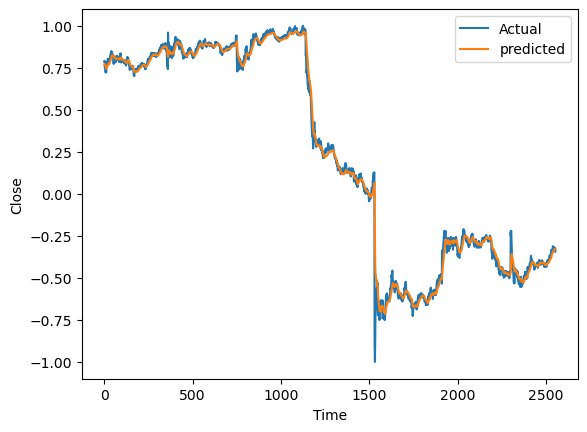

In [23]:
plt.plot(y_train,label="Actual")
plt.plot(predicted[:,0],label='predicted')
plt.xlabel("Time")
plt.ylabel("Close")
plt.legend()
plt.show()

In [24]:
dummies=np.zeros((x_train.shape[0],lookback+1))
dummies[:,0]=predicted[:,0]
dummies=scalar.inverse_transform(dummies)
train_prediction=dc(dummies[:,0])
train_prediction

array([188.08492459, 188.09816512, 188.1199183 , ..., 179.24111244,
       179.24420677, 179.24642828])

In [25]:
dummies=np.zeros((x_train.shape[0],lookback+1))
dummies[:,0]=y_train.flatten()
dummies=scalar.inverse_transform(dummies)
new_y_train=dc(dummies[:,0])
new_y_train

array([188.24960306, 188.27000418, 187.9400025 , ..., 179.24999992,
       179.24000553, 179.10000617])

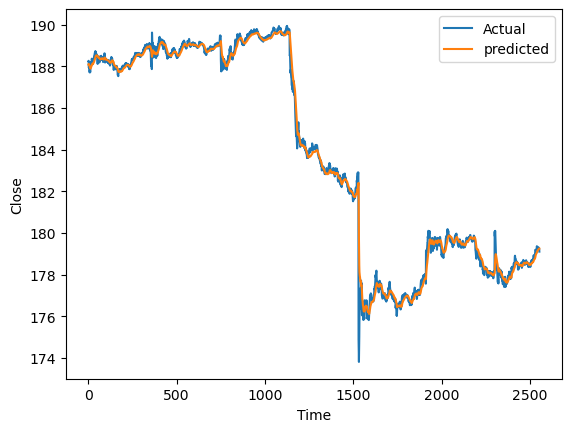

In [26]:
plt.plot(new_y_train,label="Actual")
plt.plot(train_prediction,label='predicted')
plt.xlabel("Time")
plt.ylabel("Close")
plt.legend()
plt.show()

In [27]:
dummies=np.zeros((x_test.shape[0],lookback+1))
dummies[:,:4]=model(x_test.to(device)).detach().cpu().numpy()
dummies=scalar.inverse_transform(dummies)
test_prediction=dc(dummies[:,0])
test_prediction

array([179.22694929, 179.222226  , 179.2254731 , 179.22758009,
       179.22675996, 179.20643461, 179.21123104, 179.22255487,
       179.22479009, 179.22561744, 179.22804754, 179.22188173,
       179.21133858, 179.18996311, 179.19049479, 179.20430525,
       179.23190258, 179.25680374, 179.28686533, 179.28995966,
       179.29153618, 179.28223273, 179.27386538, 179.25782909,
       179.23435432, 179.20995188, 179.217923  , 179.2450743 ,
       179.27134099, 179.2969634 , 179.32407405, 179.34657182,
       179.34062807, 179.35259545, 179.35953014, 179.38525144,
       179.40422208, 179.41631817, 179.41807319, 179.42044747,
       179.43444077, 179.44459947, 179.45812917, 179.45038083,
       179.44987104, 179.46015172, 179.46594391, 179.46799894,
       179.4756496 , 179.4765128 , 179.47079711, 179.47591327,
       179.47703004, 179.47961964, 179.46955717, 179.47114427,
       179.46863214, 179.46001748, 179.47411013, 179.46790583,
       179.46432529, 179.46133561, 179.46777568, 179.47

In [28]:
dummies=np.zeros((x_test.shape[0],lookback+1))
dummies[:,0]=y_test.flatten()
dummies=scalar.inverse_transform(dummies)
new_y_test=dc(dummies[:,0])
new_y_test

array([179.1501008 , 179.19000232, 179.19000232, 179.17990112,
       179.06350717, 179.18989575, 179.24000553, 179.20500172,
       179.19999695, 179.21000673, 179.16130073, 179.12499996,
       179.0449982 , 179.15499876, 179.24499515, 179.35499571,
       179.38999927, 179.46000665, 179.33999631, 179.33000192,
       179.25999454, 179.24499515, 179.17999278, 179.10499579,
       179.05999759, 179.22000112, 179.35499571, 179.39500429,
       179.42889397, 179.47999566, 179.49000545, 179.33999631,
       179.4299927 , 179.40739436, 179.53500364, 179.52780142,
       179.50500484, 179.44999687, 179.44560244, 179.50999446,
       179.50000007, 179.52999887, 179.41999807, 179.44970697,
       179.51499947, 179.49989326, 179.48109439, 179.50680534,
       179.47000128, 179.41999807, 179.47000128, 179.44500725,
       179.44999687, 179.37500012, 179.43800351, 179.42010489,
       179.38000489, 179.50999446, 179.41000368, 179.4149933 ,
       179.40910344, 179.47000128, 179.48710623, 179.52

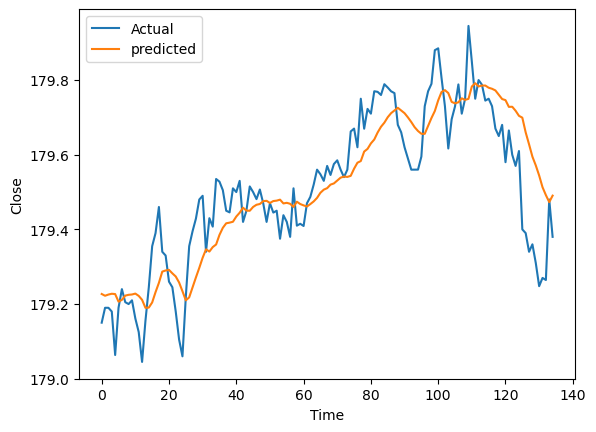

In [29]:
plt.plot(new_y_test,label="Actual")
plt.plot(test_prediction,label='predicted')
plt.xlabel("Time")
plt.ylabel("Close")
plt.legend()
plt.show()

In [30]:
torch.cuda.empty_cache()